<a href="https://colab.research.google.com/github/rabbeeaa/rabbeeaa/blob/main/Prodigy_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 02
K mean Clustering algorith to group customers of the retail store based on their purchase history.

In [1]:
#importing libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#reading data from CSV file
df = pd.read_csv('/content/archive_3.zip')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

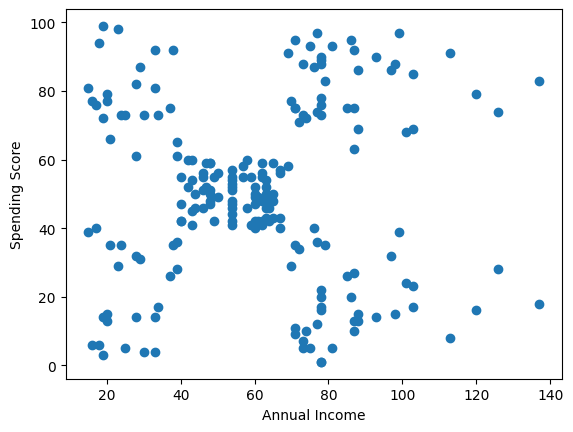

In [4]:
#scatter plot
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [5]:
#data scalling using Min-Max scaling
user_range = (1,10)
scaler = MinMaxScaler(feature_range=user_range)
income = np.array(df["Annual Income (k$)"]).reshape(-1,1)
score = np.array(df["Spending Score (1-100)"]).reshape(-1,1)
df_income = scaler.fit_transform(income)
df_score = scaler.fit_transform(score)

In [6]:
#Elbow method for optimal K
sse = []
data = pd.DataFrame(df[["Annual Income (k$)","Spending Score (1-100)"]])
for i in range(1,11):
  km = KMeans(n_clusters=i,n_init = 20)
  km.fit(data)
  sse.append(km.inertia_)

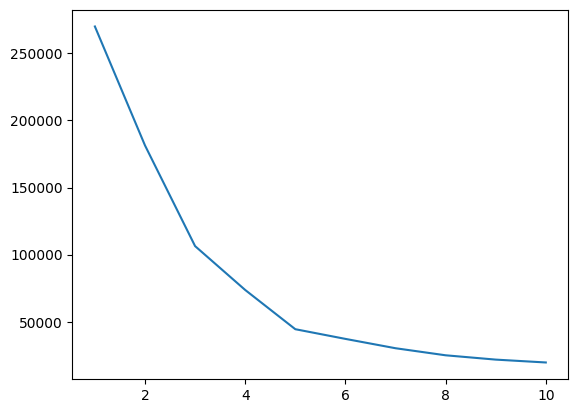

In [7]:
x = [i for i in range(1,11)]
plt.plot(x,sse)

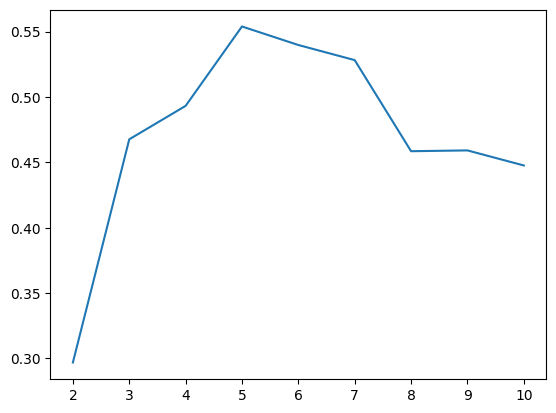

In [8]:
#Silhouette Score for Optimal K
silhouette = []
for j in range(2,11):
  km = KMeans(n_clusters=j,n_init = 20)
  km.fit(data)
  silhouette.append(silhouette_score(data, km.labels_))
x = [i for i in range(2,11)]
plt.plot(x,silhouette)

In [9]:
#K mean clustering
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
km = KMeans(n_clusters=5,n_init = 15)
clusters = km.fit_predict(data)
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [11]:
data["c_inx"] = clusters
data

,Annual Income (k$),Spending Score (1-100),c_inx
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


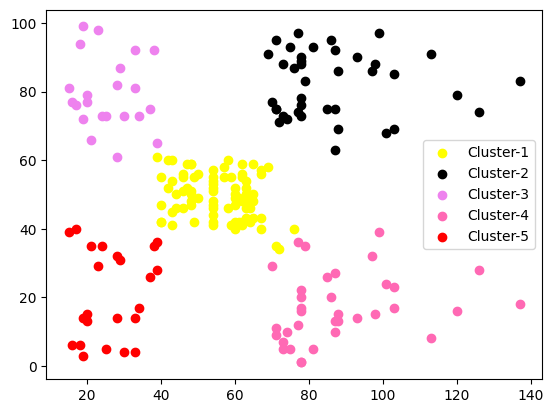

In [12]:
#plotting clusters
c1 = data[data["c_inx"] == 0]
c2 = data[data["c_inx"] == 1]
c3 = data[data["c_inx"] == 2]
c4 = data[data["c_inx"] == 3]
c5 = data[data["c_inx"] == 4]
plt.scatter(c1["Annual Income (k$)"],c1["Spending Score (1-100)"],color="yellow",label="Cluster-1")
plt.scatter(c2["Annual Income (k$)"],c2["Spending Score (1-100)"],color="black",label="Cluster-2")
plt.scatter(c3["Annual Income (k$)"],c3["Spending Score (1-100)"],color="violet",label="Cluster-3")
plt.scatter(c4["Annual Income (k$)"],c4["Spending Score (1-100)"],color="hotpink",label="Cluster-4")
plt.scatter(c5["Annual Income (k$)"],c5["Spending Score (1-100)"],color="red",label="Cluster-5")
plt.legend()

In [13]:
#Predicting a New Data Point
inp = pd.DataFrame({"Annual Income (k$)":[15],"Spending Score (1-100)":[81]})
inp_x = np.array(inp["Annual Income (k$)"]).reshape(-1,1)
print(inp_x)
inp_y = np.array(inp["Spending Score (1-100)"]).reshape(-1,1)
ans = km.predict(inp)
print("Cluster:",ans[0]+1)
print(inp)

[[15]]
Cluster: 3
   Annual Income (k$)  Spending Score (1-100)
0                  15                      81
